In [3]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import umap

C:\Users\yedidyab\Anaconda3\envs\piplnew\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:
df_path = r'X:\yedidyab\dl_project\test_data\temp_files\props_df\*'
cell_by_OD_path = r'X:\yedidyab\dl_project\test_data\merged_cell_by_OD.raw.txt'
# encoding_file_path = r'X:\dl4cv_project\data_for_einav\Outputs\encodings.csv'
encoding_file_path = r'X:\dl4cv_project\rotate_single_cell\Outputs_32\encodings.csv'
dim = 32
# filenames_path = r'X:\dl4cv_project\data_for_einav\Outputs\filenames.csv'
filenames_path = r'X:\dl4cv_project\rotate_single_cell\Outputs_32\filenames.csv'


In [53]:
# concatenate df_prop files
dfs = []
for file in glob.iglob(df_path):
    name = '_'.join(file.split('\\')[-1].split('_')[:2])
    if 'single' in file:
        df = pd.read_csv(file)
        df['field_of_view'] = name
        dfs.append(df)
prop_df = pd.concat(dfs)
print(len(prop_df))

10296


In [54]:
#load cell_by_OD
od = pd.read_csv(cell_by_OD_path, sep = '\t')[['field_of_view','cell_id','sample_name']]
od.rename(columns={'cell_id':'label', 'sample_name':'OD'}, inplace=True)


In [55]:
# merge od_df with props_df
df = od.merge(prop_df, on = ['field_of_view','label'])

# clean no signal cells
df=df[pd.to_numeric(df['OD'], errors='coerce').notnull()]

#sort by OD
df['OD'] = pd.to_numeric(df.OD)
df.sort_values(by = 'OD', inplace=True)
df.label = df['label'].apply(str)
df['fov_label'] = df.field_of_view + '_' + df.label
df.drop(['field_of_view','label','label.1'], axis=1, inplace=True)

df

,OD,area,axis_major_length,axis_minor_length,centroid-0,centroid-1,extent,orientation,eccentricity,equivalent_diameter_area,...,dapi_med,ribo_med,dapi_20,ribo_20,dapi_fc,ribo_fc,dapi_cv,ribo_cv,in_div,fov_label
4695,0.06,308,32.416624,12.165001,689.344156,1665.214286,0.550000,-0.533912,0.926915,19.802974,...,5852.5,3145.5,5634.4,2938.4,0.452671,0.278521,0.208293,0.405754,False,fov_12_1137
6162,0.06,304,29.541675,13.138919,1562.332237,959.680921,0.608000,-0.972035,0.895650,19.673963,...,7068.5,3664.5,6165.4,2890.8,0.358620,0.351764,0.336750,0.334906,False,fov_12_2672
1055,0.06,244,25.106664,12.396022,614.323770,1904.536885,0.847222,1.523737,0.869613,17.625846,...,4416.0,1940.0,4243.6,1710.0,0.241787,0.328593,0.576695,0.442629,False,fov_11_1097
262,0.06,253,26.745474,12.139431,186.426877,517.375494,0.620098,0.473451,0.891059,17.947969,...,6574.0,2900.0,6128.0,2777.8,0.468466,0.460893,0.237729,0.221126,False,fov_11_268
10253,0.06,331,32.513908,13.086719,1977.661631,97.326284,0.821340,-1.527009,0.915422,20.529060,...,5240.0,2712.0,5075.0,2533.0,0.496430,0.659807,0.162900,0.094257,False,fov_13_3449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,6.10,149,18.567379,10.229675,1369.664430,1424.040268,0.620833,0.837042,0.834539,13.773623,...,5941.0,4269.0,5584.4,3299.0,0.422453,0.304589,0.307578,0.472946,False,fov_13_2393
2398,6.10,169,19.099377,11.276010,1325.461538,1688.745562,0.722222,0.430449,0.807121,14.668929,...,5261.0,1916.0,5064.0,1845.2,0.848241,0.774969,0.048181,0.070504,False,fov_11_2483
5127,6.10,184,19.702545,11.888669,939.516304,1173.043478,0.807018,1.310145,0.797433,15.306080,...,4992.0,2968.0,4899.6,2844.6,0.938441,0.869377,0.020214,0.041834,False,fov_12_1592
2400,6.10,159,20.501158,9.876505,1324.327044,183.176101,0.697368,1.181668,0.876307,14.228320,...,6467.0,3198.0,6179.8,3037.6,0.648389,0.786739,0.084203,0.058093,False,fov_11_2485


In [56]:
def plot_boxplot(df, x, y):
    sns.boxplot(x=x, y=y, data=df)
    plt.show()

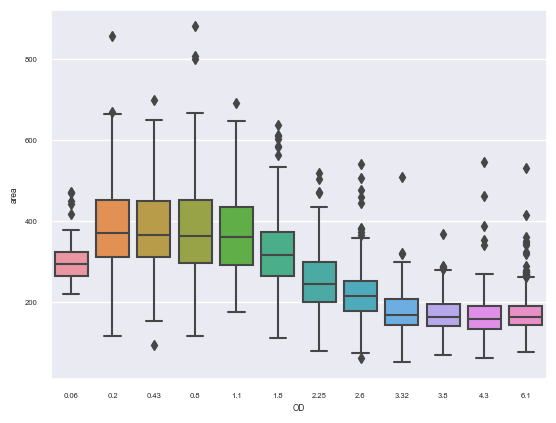

In [57]:
#plot area by OD
plot_boxplot(df, 'OD', 'area')

In [58]:
# Import the CSV file into a pandas DataFrame
filenames = pd.read_csv(filenames_path, names = ['path'])

# Extract only the file name from the path
filenames.path = filenames.path.str.split('/').str[-1]

# Extract the field of view from the file name
filenames['field_of_view'] = filenames.path.str.split('_').str[:2]
filenames.field_of_view = 'fov_' + filenames.field_of_view.str[1]

# Extract the label from the file name
filenames['label'] = filenames.path.str.split('_').str[5]

filenames

,path,field_of_view,label
0,label_1000_bb_788_630.npy,fov_1000,NaN
1,label_1000_bb_974_570.npy,fov_1000,NaN
2,label_1001_bb_791_628.npy,fov_1001,NaN
3,label_1001_bb_807_583.npy,fov_1001,NaN
4,label_1001_bb_971_601.npy,fov_1001,NaN
...,...,...,...
7947,label_997_bb_809_633.npy,fov_997,NaN
7948,label_998_bb_1188_618.npy,fov_998,NaN
7949,label_998_bb_506_594.npy,fov_998,NaN
7950,label_999_bb_1645_606.npy,fov_999,NaN


In [59]:
encoding = pd.read_csv(encoding_file_path, header=None)
encoding['field_of_view'] = filenames.field_of_view
encoding['label'] = filenames.label
encoding['fov_label'] = encoding.field_of_view + '_' + encoding.label

encoding.drop(['field_of_view','label'], axis=1, inplace=True)
encoding

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,fov_label
0,-0.238414,0.638201,-0.436752,1.220372,-0.385300,-0.078651,0.003272,0.798441,-6.665684,1.127147,...,0.269953,-0.795360,-0.108196,-0.021093,-0.130477,0.220972,0.532947,-0.223833,-1.054023,NaN
1,-0.076534,0.281091,0.005714,0.809105,0.266390,-0.382157,-0.432954,-0.399038,-3.135425,-0.113262,...,-0.564496,-0.613645,-0.109304,-0.236961,0.638989,-0.208802,0.446335,-0.047484,-0.386112,NaN
2,0.056007,0.133686,-0.012369,-0.028092,0.228427,-0.362291,-0.070171,0.436666,0.746999,-0.662069,...,-0.096084,0.015744,0.004453,0.502006,-0.037220,1.172549,2.014156,-0.024287,1.234006,NaN
3,-0.124386,-2.075235,-0.639399,-0.521382,0.715507,0.106901,-0.554393,0.556976,-0.027596,0.724983,...,-0.388027,0.239336,0.288719,1.463083,0.244085,0.027901,0.052316,-2.449156,0.630073,NaN
4,-0.307122,0.297210,-0.028413,0.000367,-0.237738,1.136170,0.055167,0.132047,1.734137,0.114146,...,-0.173458,1.342555,0.161464,-0.156345,-1.084542,0.476470,1.274344,-0.649340,-0.439324,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,0.446381,-1.614533,1.337555,0.009090,-0.001073,-0.042986,0.437119,0.107295,-5.521708,1.077472,...,0.145051,0.816923,0.608941,-0.124106,1.779599,0.824318,0.928601,0.221265,-0.788807,NaN
7948,0.184781,-0.129844,-0.775992,1.492857,-0.167635,0.052085,-0.701112,-0.264667,4.617162,-0.237108,...,-0.196450,-0.002792,-1.095595,-0.412547,0.121353,-0.022260,0.538903,-6.193359,-0.568538,NaN
7949,-0.142740,0.216384,-0.389698,0.517876,0.515110,-2.536223,0.407530,-0.285140,2.800055,0.102191,...,2.308287,-0.195622,-0.323155,0.924024,-0.547145,-0.205429,-0.612845,-0.038231,1.154370,NaN
7950,0.134539,0.796194,0.892641,-0.071185,-1.605380,-0.458883,0.229518,-0.030143,0.642726,0.590209,...,0.048999,0.651191,-0.422995,0.568911,-0.406239,1.050383,-0.913215,-0.734951,0.034757,NaN


In [60]:
assert len(encoding.fov_label) == len(df.fov_label)
assert len(encoding.fov_label.unique()) == len(encoding.fov_label)
assert len(df.fov_label.unique()) == len(df.fov_label)


AssertionError: 

In [ ]:
merged_df = encoding.merge(df, on='fov_label')
correlation = merged_df.corr()

In [61]:
os.getcwd()

'C:\\Users\\yedidyab\\Box\\Yedidya_Ben_Eliyahu\\dl_proj\\dl_project\\notebooks'

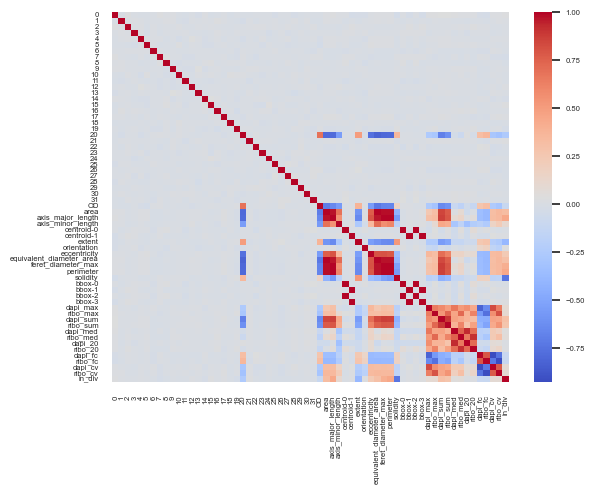

In [62]:
sns.heatmap(correlation, annot=False, cmap='coolwarm', xticklabels=True, yticklabels=True)
sns.set(font_scale = .5)

plt.savefig('heatmap.png', dpi=900)

In [63]:
# merged_df.iloc[:,13] = 0
# correlation = merged_df.corr()
# sns.heatmap(correlation, annot=False, cmap='coolwarm')
# plt.savefig('heatmap')

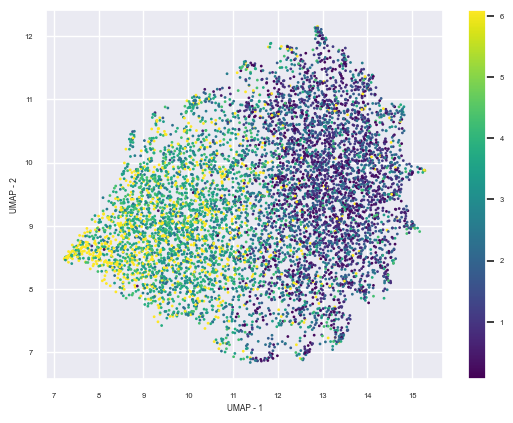

In [64]:
# Split the latent space columns from the "OD" column
latent_space = merged_df.iloc[:, :dim].values
categories = merged_df['OD'].values

# Perform UMAP dimensionality reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_space)

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
plt.colorbar()
plt.savefig('UMAP_by_OD.png', dpi=900)

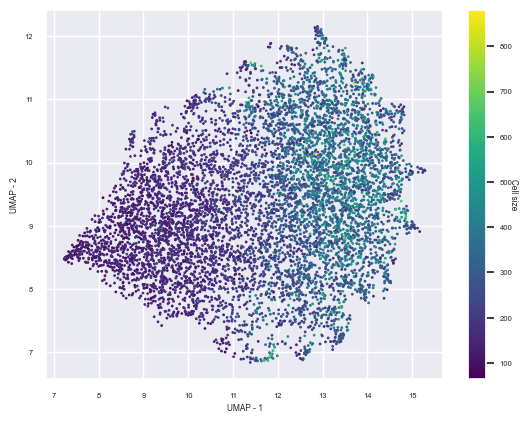

In [65]:
categories = merged_df['area'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('Cell size', rotation=270)

plt.savefig('UMAP_by_area.png', dpi=900)

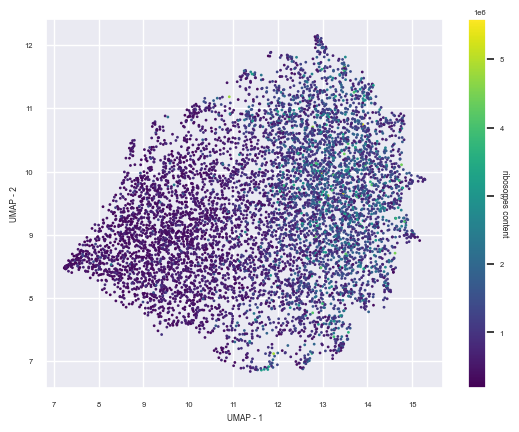

In [66]:
categories = merged_df['ribo_sum'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('ribosomes content', rotation=270)
plt.savefig('UMAP_by_ribo_sum.png', dpi=900)

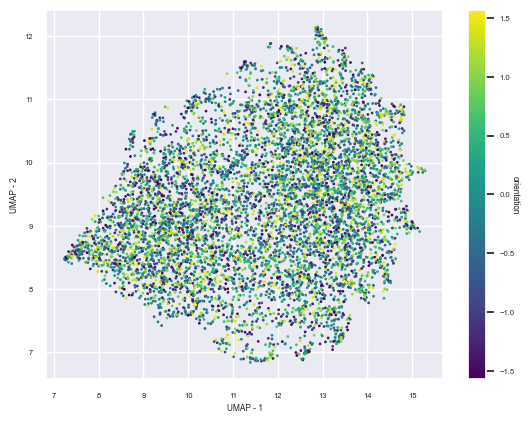

In [67]:
categories = merged_df['orientation'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('orientation', rotation=270)
plt.savefig('UMAP_by_orientation.png', dpi=900)

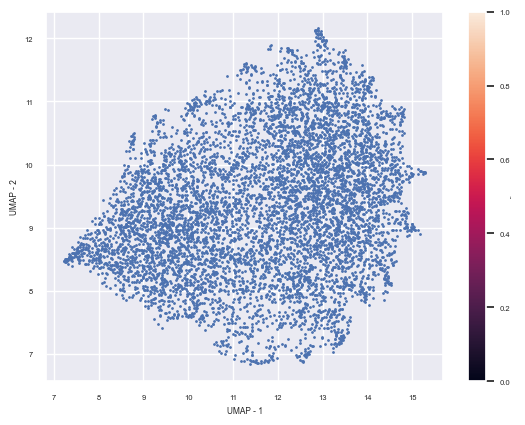

In [68]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
# plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('..', rotation=270)
plt.savefig('UMAP_clean.png', dpi=900)

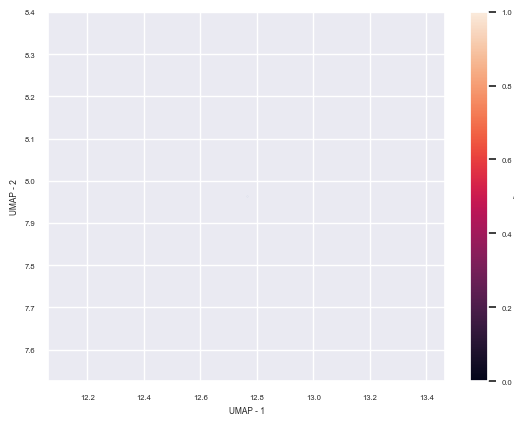

In [69]:
plt.scatter(embedding[:, 0][1], embedding[:, 1][1], s=.001)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('..', rotation=270)
plt.savefig('UMAP_empty.png', dpi=900)

In [70]:
encoding

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,fov_label
0,-0.238414,0.638201,-0.436752,1.220372,-0.385300,-0.078651,0.003272,0.798441,-6.665684,1.127147,...,0.269953,-0.795360,-0.108196,-0.021093,-0.130477,0.220972,0.532947,-0.223833,-1.054023,NaN
1,-0.076534,0.281091,0.005714,0.809105,0.266390,-0.382157,-0.432954,-0.399038,-3.135425,-0.113262,...,-0.564496,-0.613645,-0.109304,-0.236961,0.638989,-0.208802,0.446335,-0.047484,-0.386112,NaN
2,0.056007,0.133686,-0.012369,-0.028092,0.228427,-0.362291,-0.070171,0.436666,0.746999,-0.662069,...,-0.096084,0.015744,0.004453,0.502006,-0.037220,1.172549,2.014156,-0.024287,1.234006,NaN
3,-0.124386,-2.075235,-0.639399,-0.521382,0.715507,0.106901,-0.554393,0.556976,-0.027596,0.724983,...,-0.388027,0.239336,0.288719,1.463083,0.244085,0.027901,0.052316,-2.449156,0.630073,NaN
4,-0.307122,0.297210,-0.028413,0.000367,-0.237738,1.136170,0.055167,0.132047,1.734137,0.114146,...,-0.173458,1.342555,0.161464,-0.156345,-1.084542,0.476470,1.274344,-0.649340,-0.439324,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,0.446381,-1.614533,1.337555,0.009090,-0.001073,-0.042986,0.437119,0.107295,-5.521708,1.077472,...,0.145051,0.816923,0.608941,-0.124106,1.779599,0.824318,0.928601,0.221265,-0.788807,NaN
7948,0.184781,-0.129844,-0.775992,1.492857,-0.167635,0.052085,-0.701112,-0.264667,4.617162,-0.237108,...,-0.196450,-0.002792,-1.095595,-0.412547,0.121353,-0.022260,0.538903,-6.193359,-0.568538,NaN
7949,-0.142740,0.216384,-0.389698,0.517876,0.515110,-2.536223,0.407530,-0.285140,2.800055,0.102191,...,2.308287,-0.195622,-0.323155,0.924024,-0.547145,-0.205429,-0.612845,-0.038231,1.154370,NaN
7950,0.134539,0.796194,0.892641,-0.071185,-1.605380,-0.458883,0.229518,-0.030143,0.642726,0.590209,...,0.048999,0.651191,-0.422995,0.568911,-0.406239,1.050383,-0.913215,-0.734951,0.034757,NaN


C:\Users\yedidyab\Anaconda3\envs\piplnew\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


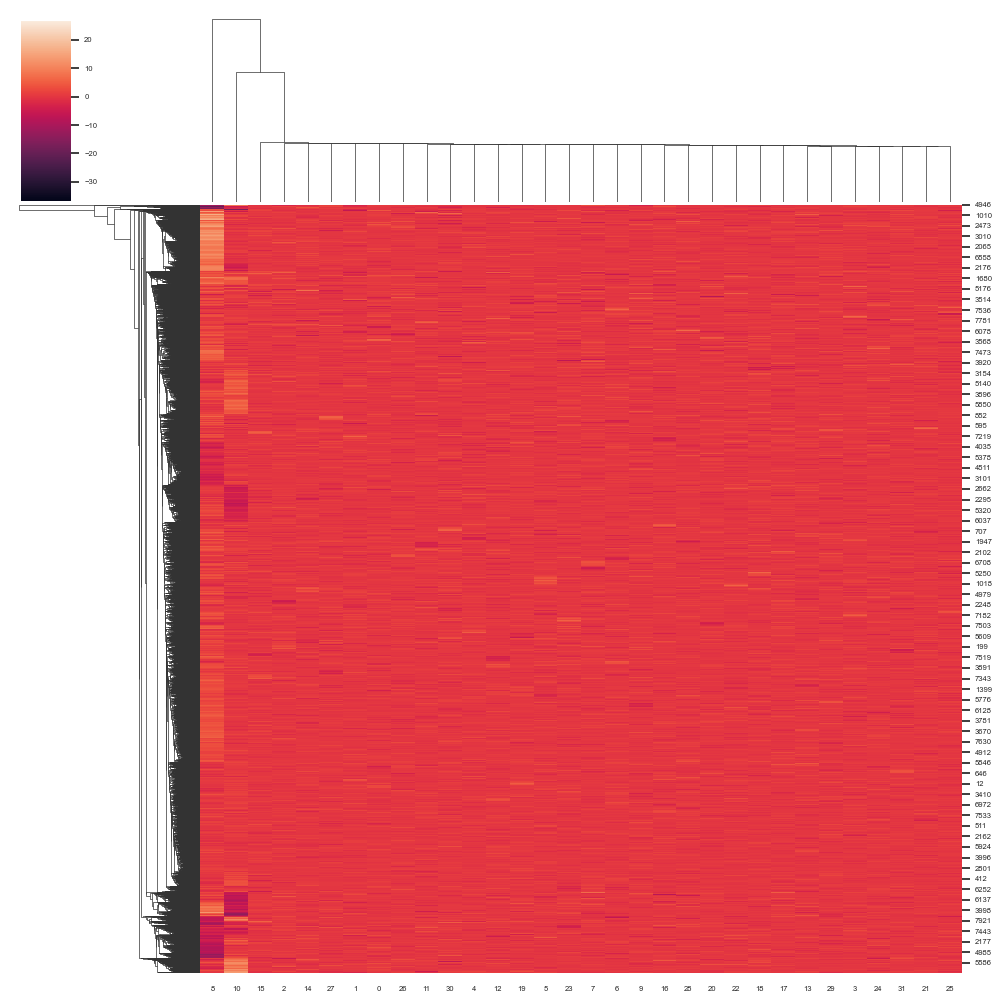

In [71]:

# drop the "fov_label" column from the dataframe
encoding = encoding.drop('fov_label', axis=1)

# create a clustermap using the remaining columns
sns.clustermap(encoding)